# Queue Analysis

Inputs:

queue_model_parms

queue_model_arrivals

Outputs:

Lq = Average number of customers in the queue

Wq = Average waiting time in the queue

###### Parameters

In [240]:
import pandas as pd
import numpy as np
import math
import simpy as sp
import matplotlib.pyplot as plt
# Read Arrivals file
Arrivals = pd.read_excel('Queue Model - Arrivals.xlsx')
Parms = pd.read_excel('Queue Model - Parms.xlsx', sheet_name='Parameters')
Values = Parms['Value']
# Get Mu (𝜇), the service rate (transactions per hour)
Mu = Values[2]
# Get s, the number of servers (also referred to as n in Queueing Theory)
s = Values[4]       
Growth = Values[3] /100
env = sp.Environment()

###### Calculate Lambda (𝜆) : average number of customers for every timeslot   

In [241]:
startnum = 400
Lambda = [] 
Hour = []
for i in range(0,18):
    startnum = startnum + 100
    Hour.append(str(startnum))
    label = "T" + str(startnum)
    number = Arrivals[label].mean()
    # round up the average 
    result = math.ceil(number)
    calc_cust_count = result + (result * Growth)
    result = math.ceil(calc_cust_count)
    Lambda.append(result)


###### Calculate Rho (ρ) = 𝜆 / s𝜇  

In [242]:
Rho = [] 
for i in range(0,18):
    calc_rho = (Lambda[i]) / (s * Mu) 
    Rho.append(calc_rho)

###### Calculate Term0 = (𝜆/𝜇)^𝑛/𝑛! 


In [243]:
Term0 = [] 
for i in range(0,18):
    fact_s = math.factorial(s)
    t1 = Lambda[i] / Mu
    calc_Term0 = pow(t1,s) / fact_s 
    Term0.append(calc_Term0)

###### Calculate Term1

In [244]:
Term1 = []
Constant1 = 1
for i in range(0,18):
    if s==1:
        print('s = 1', 'i=',i)
        Term1[i] = Constant1
        Term1.append(Term1[i])
    else:
        calc_Term1 = 0
        for j in range(1,int(s)):
            Fact_j = math.factorial(j)
            x = Lambda[i] / Mu
            temp = pow(x,j) / Fact_j 
            calc_Term1 = calc_Term1 + temp
            # print('i =',i,' j=',j,'  calc_Term1', calc_Term1) 
        Term1.append(calc_Term1 + Constant1)                    

###### Calculate Term2 = ((𝜆/𝜇)^s/s!)/(1-𝜆/(s*𝜇)) 

In [245]:

Constant1 = 1
fact_s = math.factorial(s)
Term2 = []
for i in range(0,18):
    denominator = (1 - (Lambda[i]) / (s*Mu))
    calc_Term2 = Term0[i] / denominator 
    Term2.append(calc_Term2)


###### Calculate P0 (Probability the queue is empty)

P0 = 1 / (Term1 + Term2)

In [246]:
P0 = []
for i in range(0,18):
    calc_P0 = 1 / (Term1[i] + Term2[i])
    P0.append(calc_P0)

###### Calculate Lq (Average number of customers in the queue)

Lq = P0*((𝜆/𝜇)^𝑛/𝑛!)*rho/(1-rh)^2

In [247]:
Lq = []
for i in range(0,18):
    x = 1-Rho[i]
    calc_Lq =( P0[i] * Term0[i] * Rho[i]) / pow(x,2)
    Lq.append(calc_Lq)


###### Calculate Wq (Average Waiting time in the queue) 

Wq (Hours) =  (Lq / Lambda)

Wq (Mins) = Wq (Hours) * 60

In [248]:
Wq = []
for i in range(0,18):
    calc_Wq = (Lq[i] / Lambda[i] ) * 60
    Wq.append(calc_Wq)

# Summary Table

In [249]:
 print('Hour', '\t', 'Ave # of Customers in Queue', '\t', 'Average Waiting Time (Mins) ')
for i in range(0,18):
    print(Hour[i],'\t', Lambda[i], '\t', '\t','\t', '\t',Wq[i] )

Hour 	 Ave # of Customers in Queue 	 Average Waiting Time (Mins) 
500 	 5 	 	 	 	 0.010495161730442267
600 	 17 	 	 	 	 0.12919954400160943
700 	 27 	 	 	 	 0.36544101060230105
800 	 31 	 	 	 	 0.514660597134824
900 	 19 	 	 	 	 0.16429627944020936
1000 	 21 	 	 	 	 0.20480668756530823
1100 	 21 	 	 	 	 0.20480668756530823
1200 	 19 	 	 	 	 0.16429627944020936
1300 	 30 	 	 	 	 0.4734848484848484
1400 	 33 	 	 	 	 0.606060606060606
1500 	 36 	 	 	 	 0.7700534759358287
1600 	 29 	 	 	 	 0.4350187508082245
1700 	 30 	 	 	 	 0.4734848484848484
1800 	 14 	 	 	 	 0.08566433566433568
1900 	 17 	 	 	 	 0.12919954400160943
2000 	 15 	 	 	 	 0.09902951079421665
2100 	 17 	 	 	 	 0.12919954400160943
2200 	 8 	 	 	 	 0.027111751249682292


# Visualizations

Text(0, 0.5, 'Waiting time at the queue')

<Figure size 432x288 with 0 Axes>

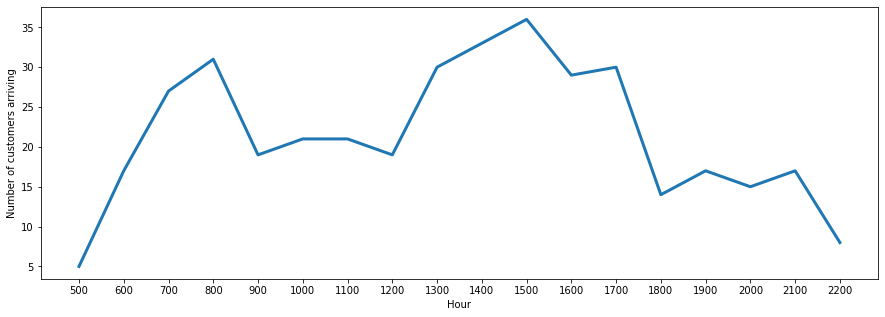

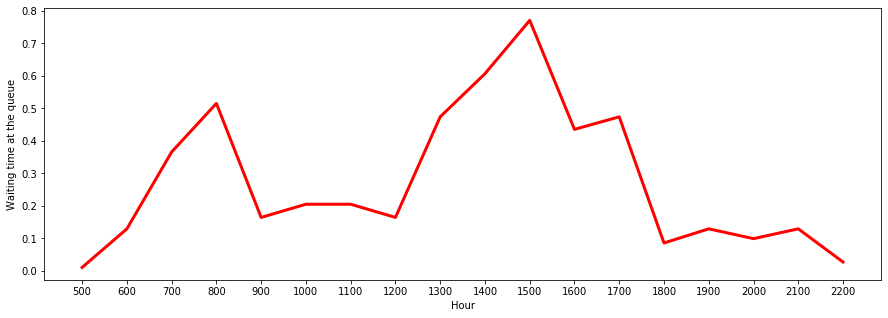

In [250]:
# Visualizations 
plt.figure(1)
plt.figure(figsize=(15, 5))
plt.plot(Hour, Lambda, linewidth=3.0)
plt.xlabel("Hour")
plt.ylabel("Number of customers arriving")

plt.figure(2)
plt.figure(figsize=(15, 5))
plt.plot(Hour, Wq, linewidth=3.0, color='r')
plt.xlabel("Hour")
plt.ylabel("Waiting time at the queue")

